In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-51.76301693663052, 167.058068140859),
 (54.33938440797621, 92.2209639418607),
 (55.776975584328284, -26.520895658248122),
 (-30.801696929636485, 6.54465979607977),
 (-27.669554298132944, 93.3222758123677),
 (79.88763657346394, 80.61345413234841),
 (-9.779465820833806, -16.14329292655566),
 (13.27117668749031, 59.84369937502825),
 (56.48727473839716, -154.6637256858244),
 (28.156096760806605, 157.8284921818074),
 (-60.64413405320441, 37.87643039236613),
 (-66.85971620276433, -8.27083420252032),
 (-77.2208237535694, 161.32809562138613),
 (-16.5706015290652, 44.880124620742095),
 (32.27034493048515, -142.05985822148304),
 (-16.94391461449611, -68.62428079736613),
 (-77.34079962839488, 72.47093727626248),
 (56.5849613019239, 98.97429304492584),
 (-12.499586021360187, 30.03086792282818),
 (68.02049630235999, 6.5107447157988645),
 (72.90685067909172, -47.75673046110495),
 (-76.5217117422011, -82.77744666830722),
 (-76.92992334889504, -21.353279637896804),
 (6.370168063335157, 102.91509896

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [ ]:
# GET THE CITY WEATHER DATA 

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [22]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | idrinskoye
Processing Record 3 of Set 1 | grindavik
Processing Record 4 of Set 1 | luderitz
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | salalah
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | hasaki
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | mahajanga
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | desaguadero
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | shitkino
Processing Record 18 of Set 1 | serenje
Processing Record 19 of Set 1 | sistranda
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | peringat
Processing Record 

Processing Record 34 of Set 4 | ulladulla
Processing Record 35 of Set 4 | ouro fino
Processing Record 36 of Set 4 | provideniya
Processing Record 37 of Set 4 | abu dhabi
Processing Record 38 of Set 4 | campbellton
Processing Record 39 of Set 4 | ormara
Processing Record 40 of Set 4 | vila
Processing Record 41 of Set 4 | vardo
Processing Record 42 of Set 4 | raga
Processing Record 43 of Set 4 | geraldton
Processing Record 44 of Set 4 | luganville
Processing Record 45 of Set 4 | loreto
Processing Record 46 of Set 4 | taltal
Processing Record 47 of Set 4 | tsumeb
Processing Record 48 of Set 4 | castro
Processing Record 49 of Set 4 | ribeira grande
Processing Record 50 of Set 4 | ozinki
Processing Record 1 of Set 5 | avera
Processing Record 2 of Set 5 | lorengau
Processing Record 3 of Set 5 | casablanca
Processing Record 4 of Set 5 | ancud
Processing Record 5 of Set 5 | amapa
Processing Record 6 of Set 5 | trat
Processing Record 7 of Set 5 | leshukonskoye
Processing Record 8 of Set 5 | pue

Processing Record 19 of Set 8 | carnot
Processing Record 20 of Set 8 | lagoa
Processing Record 21 of Set 8 | nantucket
Processing Record 22 of Set 8 | kloulklubed
Processing Record 23 of Set 8 | yerofey pavlovich
Processing Record 24 of Set 8 | teacapan
Processing Record 25 of Set 8 | laylay
Processing Record 26 of Set 8 | council bluffs
Processing Record 27 of Set 8 | tazmalt
Processing Record 28 of Set 8 | coffeyville
Processing Record 29 of Set 8 | vostok
Processing Record 30 of Set 8 | chuy
Processing Record 31 of Set 8 | tahta
Processing Record 32 of Set 8 | songjianghe
Processing Record 33 of Set 8 | hamilton
Processing Record 34 of Set 8 | saint-georges
Processing Record 35 of Set 8 | comodoro rivadavia
Processing Record 36 of Set 8 | porto santo
Processing Record 37 of Set 8 | zyryanka
Processing Record 38 of Set 8 | bajil
Processing Record 39 of Set 8 | viedma
Processing Record 40 of Set 8 | marathon
Processing Record 41 of Set 8 | bilma
Processing Record 42 of Set 8 | malegao

Processing Record 9 of Set 12 | ivankiv
Processing Record 10 of Set 12 | keningau
Processing Record 11 of Set 12 | yulara
Processing Record 12 of Set 12 | lakefield
Processing Record 13 of Set 12 | darasun
Processing Record 14 of Set 12 | himora
City not found. Skipping...
Processing Record 15 of Set 12 | sao filipe
Processing Record 16 of Set 12 | araouane
Processing Record 17 of Set 12 | middelburg
Processing Record 18 of Set 12 | pizarro
Processing Record 19 of Set 12 | welkom
Processing Record 20 of Set 12 | morondava
Processing Record 21 of Set 12 | griffith
Processing Record 22 of Set 12 | san ignacio de sabaneta
City not found. Skipping...
Processing Record 23 of Set 12 | atbasar
Processing Record 24 of Set 12 | okha
Processing Record 25 of Set 12 | saint anthony
Processing Record 26 of Set 12 | monterey
Processing Record 27 of Set 12 | tuatapere
Processing Record 28 of Set 12 | margate
Processing Record 29 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 30 

In [11]:
len(city_data)

553

In [12]:
## CREATE A DATAFRAME OF CITY WEATHER DATA
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,45.81,79,54,9.78,NZ,2021-07-28 22:12:22
1,Idrinskoye,54.3708,92.1358,48.60,91,13,2.55,RU,2021-07-28 22:12:23
2,Grindavik,63.8424,-22.4338,52.56,87,0,14.97,IS,2021-07-28 22:12:23
3,Luderitz,-26.6481,15.1594,54.93,80,0,15.48,NA,2021-07-28 22:12:24
4,Carnarvon,-24.8667,113.6333,67.48,57,100,19.17,AU,2021-07-28 22:12:24
5,Dikson,73.5069,80.5464,38.08,95,97,11.79,RU,2021-07-28 22:12:24
6,Georgetown,5.4112,100.3354,77.90,90,40,2.30,MY,2021-07-28 22:07:49
7,Salalah,17.0151,54.0924,78.89,94,90,9.22,OM,2021-07-28 22:12:25
8,Kodiak,57.7900,-152.4072,56.71,72,90,6.91,US,2021-07-28 22:12:26
9,Hasaki,35.7333,140.8333,81.28,85,100,14.94,JP,2021-07-28 22:12:26


In [17]:
# reorder the columns 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2021-07-28 22:12:22,-46.6000,168.3333,45.81,79,54,9.78
1,Idrinskoye,RU,2021-07-28 22:12:23,54.3708,92.1358,48.60,91,13,2.55
2,Grindavik,IS,2021-07-28 22:12:23,63.8424,-22.4338,52.56,87,0,14.97
3,Luderitz,NA,2021-07-28 22:12:24,-26.6481,15.1594,54.93,80,0,15.48
4,Carnarvon,AU,2021-07-28 22:12:24,-24.8667,113.6333,67.48,57,100,19.17


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
## PLOT LATTITUDE VS. TEMPERATURE

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

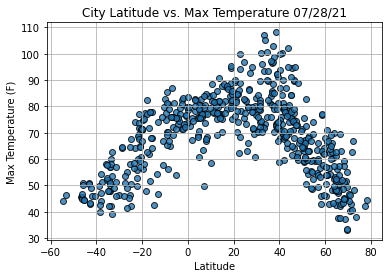

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

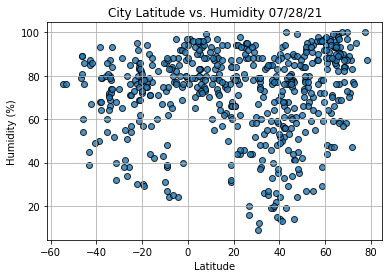

In [21]:
## PLOT LATTITUDE VS. HUMIDITY
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

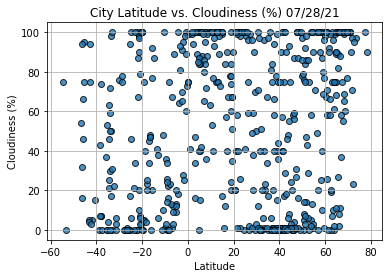

In [23]:
## PLOT LATTITUDE VS. CLOUDINESS
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

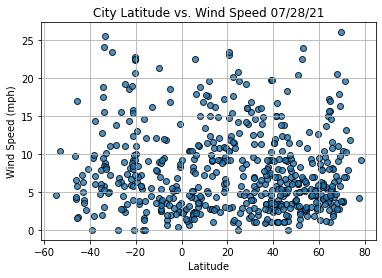

In [24]:
## PLOT LATTITUDE VS. WIND SPEED
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()